## Laboratorio 5 - Modelación y Simulación
### Ejercicio 2

Stefano Aragoni, Carol Arévalo, Luis Santos

----------------

#### Ejercicio 2 - Simulación de flujo de tráfico
Cree una simulación de flujo de tráfico utilizando modelos basados en agentes. Modele diferentes tipos de
vehículos con distintos comportamientos, cambios de carril y condiciones de la carretera.
Requisitos:
1. Cree una clase de Vehículo con subclases para diferentes comportamientos de manejo.
2. Modele diferentes comportamientos para cada tipo de comportamiento, como vehículos "agresivos" que
cambian de carril con frecuencia y vehículos "cautelosos" que mantienen una distancia segura.
3. Introducir carriles múltiples y permitir que los vehículos cambien de carril.
4. Agregue condiciones de la carretera que influyan en la velocidad de los vehículos.
5. Simule los movimientos de los vehículos y visualice sus interacciones.

----------------

#### Librerías

En esta sección se importan las librerías necesarias para el desarrollo del ejercicio. Asimismo, se definen las constantes que se utilizarán en el ejercicio.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.patches import Polygon
from PIL import Image
from matplotlib.lines import Line2D 
from IPython.display import display, Image as IPImage 

-----------

#### Clases de Agentes

En esta sección se declaraon las clases de los siguientes agentes:
- Road
- Vehicle
- AggressiveBehavior
- CautiousBehavior

In [2]:
class Vehicle:
    def __init__(self, lane, position, speed, behavior, shape="circle"): 
        self.lane = lane
        self.position = position
        self.speed = speed
        self.behavior = behavior
        self.color = 'r' if isinstance(behavior, AggressiveBehavior) else 'b'
        self.shape = shape  

    def update(self, vehicles, road):
        self.behavior.apply_behavior(self, vehicles, road)
        self.position += self.speed
        self.position %= road.road_length


In [3]:
class AggressiveBehavior:
    def apply_behavior(self, vehicle, vehicles, road):
        if random.random() < 0.8: 
            vehicle.lane = (vehicle.lane % road.num_lanes) + 1  
        vehicle.speed += 0.1
        vehicle.position += vehicle.speed

In [4]:
class CautiousBehavior:
    def apply_behavior(self, vehicle, vehicles, road):
        safe_distance = 5
        front_vehicle = None
        for v in vehicles:
            if v != vehicle and v.lane == vehicle.lane and v.position > vehicle.position:
                front_vehicle = v
                break
        if front_vehicle and (front_vehicle.position - vehicle.position) < safe_distance:
            vehicle.speed = front_vehicle.speed
        else:
            vehicle.speed += 0.05
        
        if random.random() < 0.2:  
            vehicle.lane = (vehicle.lane % road.num_lanes) + 1 
        
        vehicle.position += vehicle.speed



In [5]:
class Road:
    def __init__(self, num_lanes, road_length):
        self.num_lanes = num_lanes
        self.road_length = road_length

----------------

#### Creación y Simulación

En esta sección se crean los agente y se simula su funcionamiento. Se definen las reglas de comportamiento de los agentes y se ejecuta la simulación.

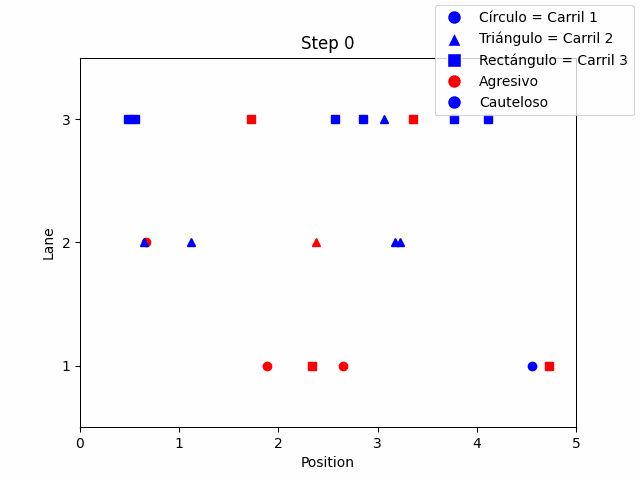

In [6]:
num_vehicles = 20
num_lanes = 3
vehicles = []

for _ in range(num_vehicles):
    lane = random.randint(1, num_lanes)  
    position = random.uniform(0, 10)
    speed = random.uniform(0.5, 1.5)
    
    if lane == 1:
        shape = "circle"  # Circle for lane 1 vehicles
    elif lane == 2:
        shape = "triangle"  # Triangle for lane 2 vehicles
    else:
        shape = "rectangle"  # Rectangle for lane 3 vehicles
    
    behavior = AggressiveBehavior() if random.random() < 0.5 else CautiousBehavior()
    vehicles.append(Vehicle(lane, position, speed, behavior, shape))

road = Road(num_lanes, 5)

num_steps = 100
list_images = []

for step in range(num_steps):
    plt.clf()
    for vehicle in vehicles:
        vehicle.update(vehicles, road)

        if vehicle.position > road.road_length:
            vehicle.position -= road.road_length
        
        if vehicle.shape == "triangle":
            plt.plot(vehicle.position, vehicle.lane, marker='^', color=vehicle.color)
        elif vehicle.shape == "circle":
            plt.scatter(vehicle.position, vehicle.lane, marker='o', color=vehicle.color)
        else:
            plt.plot(vehicle.position, vehicle.lane, marker='s', color=vehicle.color)

    plt.xlabel("Position")
    plt.ylabel("Lane")
    plt.title("Step " + str(step))
    plt.yticks(range(1, num_lanes + 1))  
    plt.ylim(0.5, num_lanes + 0.5)  
    plt.xlim(0, road.road_length)

    # Agregar una leyenda
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Círculo = Carril 1', markerfacecolor='b', markersize=10),
        Line2D([0], [0], marker='^', color='w', label='Triángulo = Carril 2', markerfacecolor='b', markersize=10),
        Line2D([0], [0], marker='s', color='w', label='Rectángulo = Carril 3', markerfacecolor='b', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='Agresivo', markerfacecolor='r', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='Cauteloso', markerfacecolor='b', markersize=10)
    ]
    
    plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.13, 1.16))

    name = "images2/step_" + str(step) + ".png"
    plt.savefig(name, format="png")
    plt.close()
    list_images.append(name)


images = [Image.open(path) for path in list_images]
gif_path = "traffic_simulation.gif"
images[0].save(gif_path, save_all=True, append_images=images[1:], loop=0, duration=300)

plt.close()

display(IPImage(filename=gif_path))


1. ¿Qué comportamientos puede observar en los diferentes tipos de comportamiento de manejo de vehículos?

*Comportamiento Agresivo (Vehículos Rojos):*

- Cambio Frecuente de Carril: Los vehículos de comportamiento agresivo cambian de carril con una alta probabilidad (80% en cada paso). Esto puede aumentar el riesgo de colisiones con otros vehículos que puedan estar en carriles.

- Aumento de Velocidad: Los vehículos agresivos aumentan su velocidad en cada paso de simulación. Esto puede llevar a situaciones en las que los vehículos agresivos se acercan rápidamente a otros vehículos, aumentando el riesgo de colisión si no se toman precauciones.

- Interacciones Arriesgadas: Debido a su cambio frecuente de carril y aumento de velocidad, los vehículos agresivos pueden realizar maniobras arriesgadas, como adelantar por espacios reducidos entre vehículos en carriles.

*Comportamiento Cauteloso (Vehículos Azules):*

- Mantener de Distancia: Los vehículos de comportamiento cauteloso mantienen una distancia segura con el vehículo que tienen delante. Si el vehículo que está delante reduce su velocidad, el vehículo cauteloso también reduce su velocidad para mantener una separación adecuada.


- Cambio Ocasional de Carril: Los vehículos cautelosos cambian de carril con una probabilidad más baja (20% en cada paso). Este cambio de carril ocasional puede ser para evitar situaciones de tráfico densas o para buscar una mejor posición en el carril.

- Conducción con precaucion: Los vehículos cautelosos tienen una evitan maniobras bruscas y mantienen una velocidad más constante en comparación con los vehículos agresivos.


En general, los vehículos agresivos tienden a correr más riesgos y tienen una mayor probabilidad de estar involucrados en colisiones o situaciones peligrosas. Por otro lado, los vehículos cautelosos buscan minimizar el riesgo al mantener distancias seguras y evitar maniobras bruscas. Estos comportamientos reflejan diferentes enfoques en la conducción y muestran cómo diferentes tipos de conductores pueden interactuar en esta simulación de tráfico.

4. ¿Cómo mejoraría este modelo?

- Lógica de cambio de carril: La lógica del cambio de carril es bastante simple. En realidad, los conductores tienen en cuenta varios factores al cambiar de carril. Se podrían introducir reglas de cambio de carril más avanzadas. 

- Colisiones: Implementa la lógica de evitación de colisiones y las consecuencias de una colision. En el código actual, no hay ningún mecanismo para evitar que los vehículos colisionen entre sí. De hecho se puede observar que los vehículos rojos tienden a chocar mas entre ellos y con los vehículos azules. Eso es porque tienen mas probabilidad de cambio de carril y de aumentar la valocidad luego del cambio. Se podría implmentar alguna lógica de retroceso al carril original en caso de una proble colisión o que los agentes se queden detenidos luego de un choque, ocasionando tráfico.

